# time series analysis 

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
#read dataset 
df=pd.read_csv("BAJFINANCE.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


<Axes: xlabel='Date'>

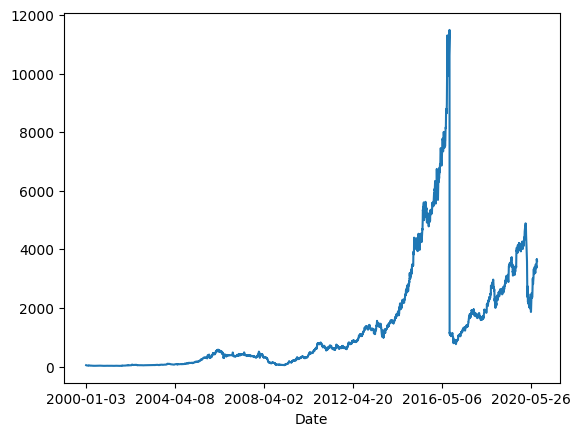

In [3]:
df.set_index("Date",inplace=True)
df["VWAP"].plot()

In [4]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [5]:
df.dropna(inplace=True)
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840


In [6]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [7]:
data=df.copy()

In [8]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
lag_features=['High', 'Low','Volume','Turnover', 'Trades']
window1=3
window7=7

In [10]:
for feature in lag_features:
    data[feature+"_rolling_mean_3"]=data[feature].rolling(window=window1).mean()
    data[feature+"_rolling_mean_7"]=data[feature].rolling(window=window7).mean()

In [11]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High_rolling_mean_3,High_rolling_mean_7,Low_rolling_mean_3,Low_rolling_mean_7,Volume_rolling_mean_3,Volume_rolling_mean_7,Turnover_rolling_mean_3,Turnover_rolling_mean_7,Trades_rolling_mean_3,Trades_rolling_mean_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,637.733333,NaN,618.666667,NaN,2.036333e+04,NaN,1.274338e+12,NaN,661.000000,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,639.233333,NaN,617.116667,NaN,1.988067e+04,NaN,1.242081e+12,NaN,278.333333,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,634.250000,NaN,611.783333,NaN,2.095467e+04,NaN,1.306735e+12,NaN,225.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,...,3538.333333,3475.992857,3430.350000,3389.157143,6.229009e+06,5.134360e+06,2.192348e+15,1.776493e+15,212607.666667,173809.285714
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,...,3627.333333,3519.921429,3514.016667,3434.671429,7.574994e+06,5.419319e+06,2.708305e+15,1.901918e+15,254151.666667,181048.285714
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,...,3678.466667,3552.842857,3579.133333,3467.500000,7.043513e+06,5.405723e+06,2.548738e+15,1.912267e+15,238727.666667,182218.571429


In [12]:
for feature in lag_features:
    data[feature+"_rolling_std_3"]=data[feature].rolling(window=window1).std()
    data[feature+"_rolling_std_7"]=data[feature].rolling(window=window7).std()

In [13]:
data.isna().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High_rolling_mean_3        2
High_rolling_mean_7        6
Low_rolling_mean_3         2
Low_rolling_mean_7         6
Volume_rolling_mean_3      2
Volume_rolling_mean_7      6
Turnover_rolling_mean_3    2
Turnover_rolling_mean_7    6
Trades_rolling_mean_3      2
Trades_rolling_mean_7      6
High_rolling_std_3         2
High_rolling_std_7         6
Low_rolling_std_3          2
Low_rolling_std_7          6
Volume_rolling_std_3       2
Volume_rolling_std_7       6
Turnover_rolling_std_3     2
Turnover_rolling_std_7     6
Trades_rolling_std_3       2
Trades_rolling_std_7       6
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.isna().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High_rolling_mean_3        0
High_rolling_mean_7        0
Low_rolling_mean_3         0
Low_rolling_mean_7         0
Volume_rolling_mean_3      0
Volume_rolling_mean_7      0
Turnover_rolling_mean_3    0
Turnover_rolling_mean_7    0
Trades_rolling_mean_3      0
Trades_rolling_mean_7      0
High_rolling_std_3         0
High_rolling_std_7         0
Low_rolling_std_3          0
Low_rolling_std_7          0
Volume_rolling_std_3       0
Volume_rolling_std_7       0
Turnover_rolling_std_3     0
Turnover_rolling_std_7     0
Trades_rolling_std_3       0
Trades_rolling_std_7       0
dtype: int64

In [16]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7'],
      dtype='object')

In [17]:
ind_features=['High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7']

In [18]:
data.shape

(2285, 34)

In [23]:
training_data=data[0:1800]
testing_data=data[1800:]